<a href="https://colab.research.google.com/github/Nehach73/DS3001/blob/main/EDA_visualization_assignment/EDA_visualization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA/Visualization Assignment



In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

Question 2: Airbnb data

1.

In [10]:
df = pd.read_csv('/content/airbnb_hw.csv',low_memory=False)

## Removing the commas from the numbers and converting the data into numeric
price = df['Price']
price = price.str.replace(',', '')
price = pd.to_numeric(price,errors='coerce')
df['Price'] = price
del price

2.

In [15]:
print("Dimensions of the data: ", df.shape)
df.head()

Dimensions of the data:  (30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


There are 30478 observations and 13 variables.

In [19]:
print("The variables are: ", '\n', df.columns)

The variables are:  
 Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


3.

In [21]:
pd.crosstab(df['Room Type'],df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


Apartments, houses, and bed & breakfasts make up a majority of the available properties, while lighthouses, castles, etc. are rare. Bigger properties like houses and B&Bs are more likely to rent out a private room than apartments, which are usually rented as a whole.

4.

<Axes: xlabel='Price', ylabel='Count'>

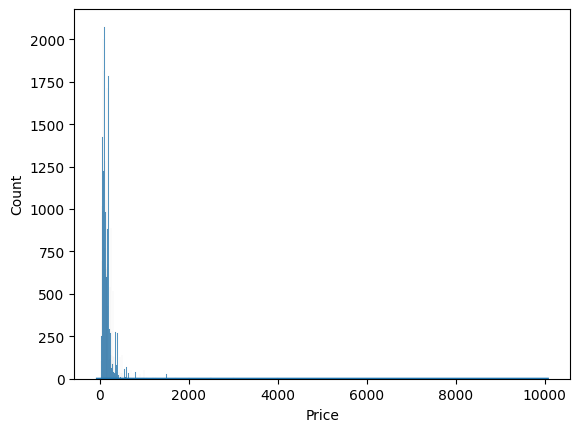

In [25]:
## histogram
sns.histplot(data = df,x = 'Price')

<Axes: xlabel='Price', ylabel='Density'>

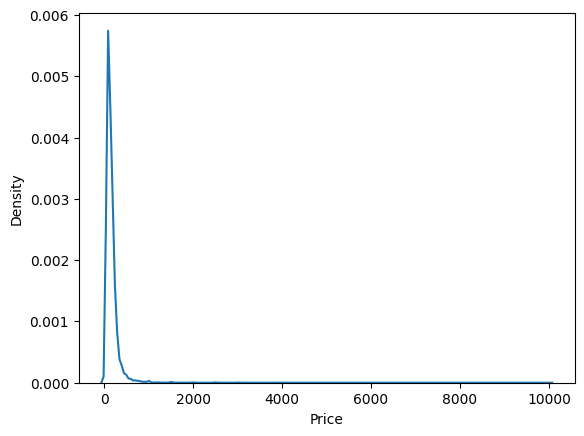

In [26]:
## kernel density plot
sns.kdeplot(data = df,x = 'Price')

<Axes: xlabel='Price'>

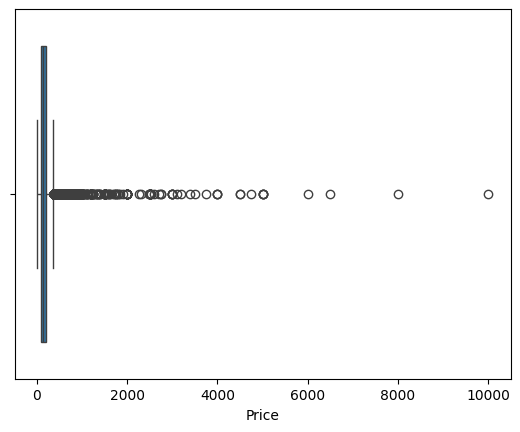

In [27]:
## boxplot
sns.boxplot(data = df,x = 'Price')

In [28]:
df['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

The data is poorly scaled because of the few outliers with a price more than a few hundred dollars.

<Axes: xlabel='Price_log', ylabel='Count'>

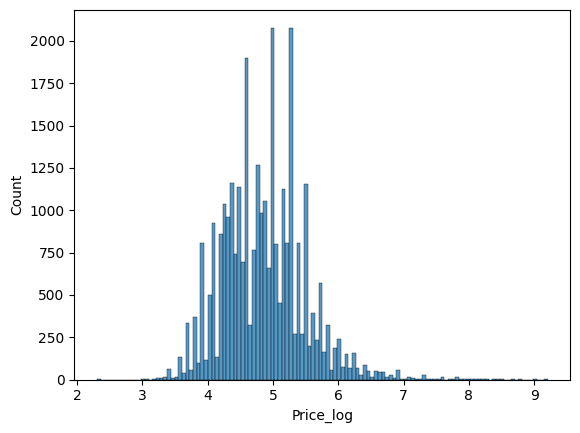

In [29]:
df['Price_log'] = np.log(df['Price']) ## Adding a new variable to rescale the data

sns.histplot(data = df,x = 'Price_log')

<Axes: xlabel='Price_log', ylabel='Density'>

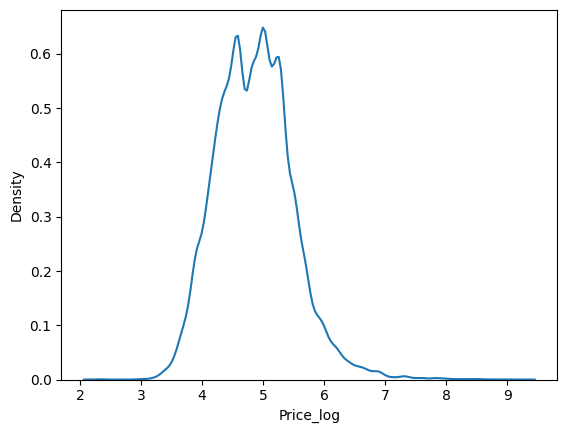

In [30]:
sns.kdeplot(data = df,x = 'Price_log')

<Axes: xlabel='Price_log'>

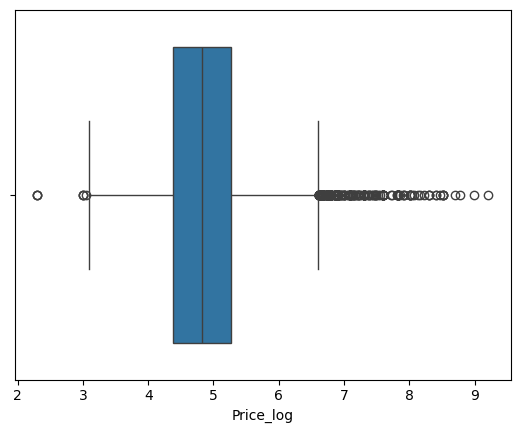

In [31]:
sns.boxplot(data = df,x = 'Price_log')

In [32]:
df['Price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64

5.

<Axes: xlabel='Beds', ylabel='Price_log'>

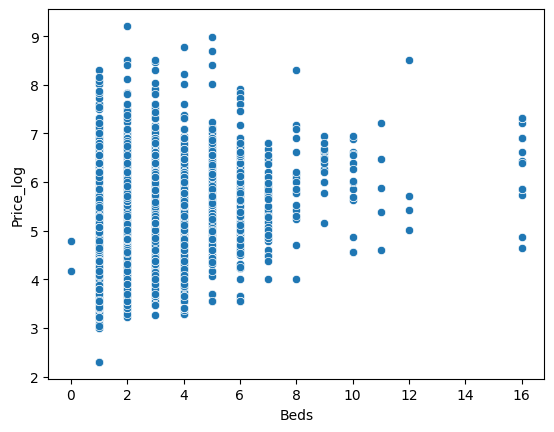

In [33]:
sns.scatterplot( data = df, x = 'Beds', y = 'Price_log')

The variability of the price range of the rentals goes down as the number of beds increases.

In [34]:
df.loc[:,['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

The average price vaguely increases as the number of beds increases, however, the standard deviation is quite variable between bedroom numbers. This is likely due to a higher number of price outliers in rentals with 6 or more beds.

6.

<Axes: xlabel='Beds', ylabel='Price_log'>

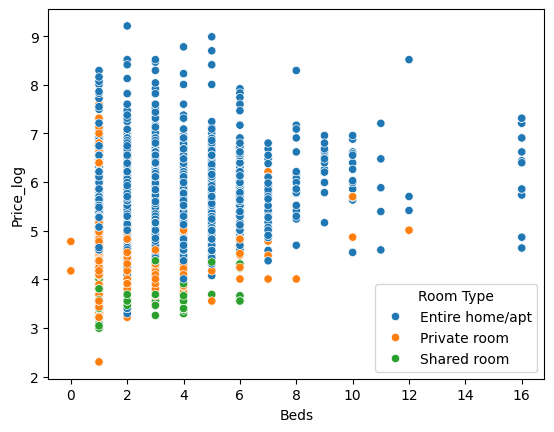

In [35]:
sns.scatterplot(data = df,x = 'Beds', y = 'Price_log', hue = 'Room Type')

Entire home/apt rentals generally have higher prices than private rooms and shared rooms (least expensive).

<Axes: xlabel='Beds', ylabel='Price_log'>

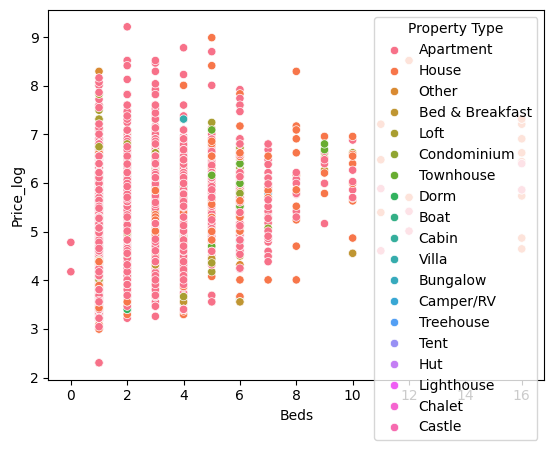

In [36]:
sns.scatterplot(data = df,x = 'Beds', y = 'Price_log', hue = 'Property Type')

It is hard to discern many patterns because of the high number of apartment data points, but it looks like apartments have high price variability, while B&Bs consistantly have lower prices and townhouses have relatively high prices.

In [41]:
df.loc[:,['Room Type', 'Price']].groupby('Room Type').describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

In [42]:
df.loc[:,['Property Type', 'Price']].groupby('Property Type').describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

Entire home/apt rentals and condomuniums have the highest average prices. The median appears more reliable because it accounts for outliers. Entire home/apt and 'other' rentals have the highest standard deviation.

7.

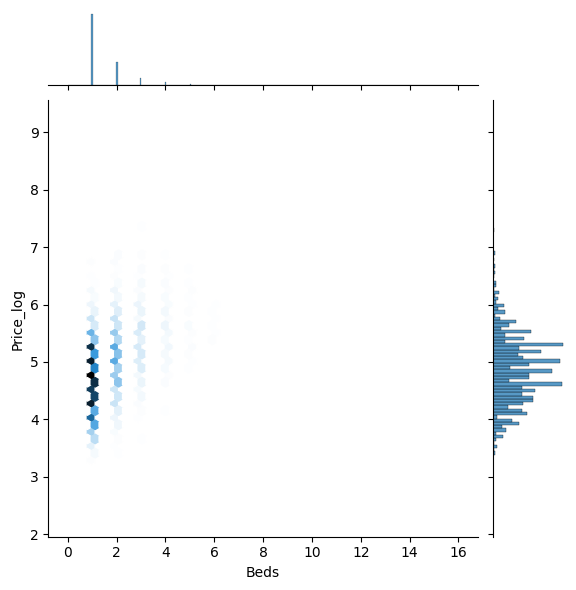

In [43]:
sns.jointplot(data = df, x = 'Beds', y = 'Price_log', kind = 'hex')

Most properties have 1-4 beds, and cost between 2.5-6 log dollars. These high density regions are not accounted for in the plots from 5 and 6, so outliers weighed more heavily on their interpretation than they should have.

Question 4:

1.

In [79]:
df = pd.read_csv('/content/County_Level FFS_Data_for_Shared_Savings_Program_Benchmark_PUF_2022_01_01.csv',low_memory=False)
df.head()

,Year,STATE_NAME,COUNTY_NAME,STATE_ID,COUNTY_ID,Per_Capita_Exp_ESRD,Avg_Risk_Score_ESRD,Person_Years_ESRD,Per_Capita_Exp_DIS,Avg_Risk_Score_DIS,Person_Years_DIS,Per_Capita_Exp_AGDU,Avg_Risk_Score_AGDU,Person_Years_AGDU,Per_Capita_Exp_AGND,Avg_Risk_Score_AGND,Person_Years_AGND
0,2022,Alabama,Autauga,1,0,79216.61,0.98136,30.67,8647.25,0.89556,430,15333.51,0.96431,93.42,10443.03,1.03195,2838.33
1,2022,Alabama,Baldwin,1,10,80017.74,0.92668,105.42,10027.96,0.90901,1479.5,20625.31,1.01834,434.67,11100.48,0.99248,18105.83
2,2022,Alabama,Barbour,1,20,76970.88,0.89154,30.17,10906.67,0.97952,267.33,19628.32,0.84603,163.33,10356.89,0.98096,1359.08
3,2022,Alabama,Bibb,1,30,79077.19,0.97499,17.83,9299.47,0.89183,250,14023.15,0.99493,133.25,10087.69,1.07534,875.5
4,2022,Alabama,Blount,1,40,67133.38,0.95756,17.83,10322.73,0.9202,440.33,19567.51,0.99556,168.92,11298.17,1.06418,2707.83


2.
The data dictionary is thorough in describing how it handles its missing values. They also go one step further and differentiate between counties with missing values (.) and counties with too few values to consider in the dataset (*).

3.

The last three variables - per capita expenditure, average risk score, and years enrolled in the program - could be interesting as they are likely to be correlated.

In [80]:
# converting the data to numeric values
expenditure = df['Per_Capita_Exp_AGND']
expenditure = expenditure.replace(['.', '*', np.nan])
expenditure = pd.to_numeric(expenditure,errors='coerce')
df['Per_Capita_Exp_AGND'] = expenditure
del expenditure

riskscore = df['Avg_Risk_Score_AGND']
riskscore = riskscore.replace(['.', '*', np.nan])
riskscore = pd.to_numeric(riskscore,errors='coerce')
df['Avg_Risk_Score_AGND'] = riskscore
del riskscore

years = df['Person_Years_AGND']
years = years.replace(['.', '*', np.nan])
years = pd.to_numeric(years,errors='coerce')
df['Person_Years_AGND'] = years
del years

4.

<Axes: xlabel='Per_Capita_Exp_AGND'>

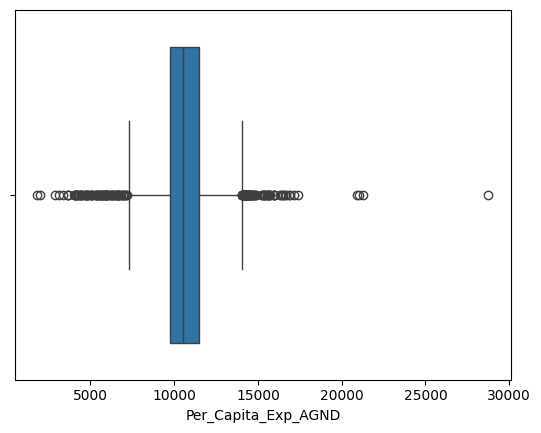

In [81]:
sns.boxplot(data = df,x = 'Per_Capita_Exp_AGND')

<Axes: xlabel='Avg_Risk_Score_AGND'>

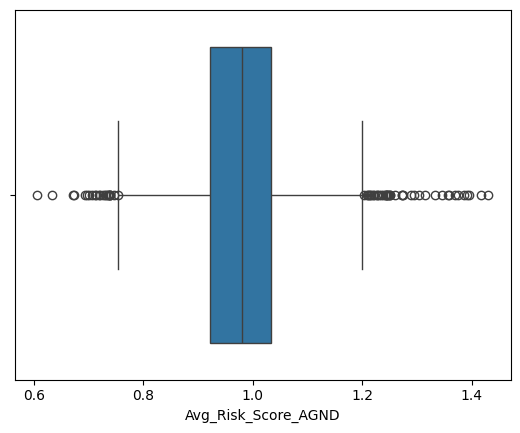

In [82]:
sns.boxplot(data = df,x = 'Avg_Risk_Score_AGND')

<Axes: xlabel='Person_Years_AGND'>

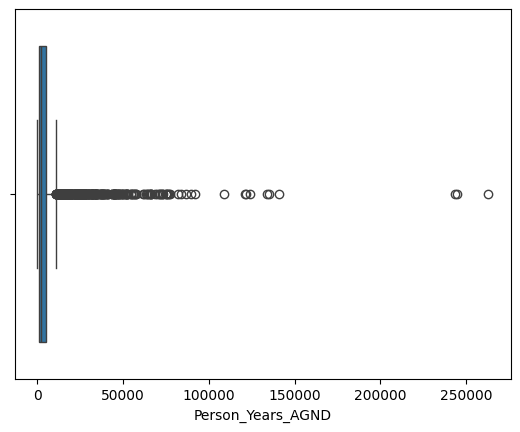

In [83]:
sns.boxplot(data = df,x = 'Person_Years_AGND')

All three variables seem to have a significant amount of outliers.

5.

<Axes: xlabel='Per_Capita_Exp_AGND', ylabel='Density'>

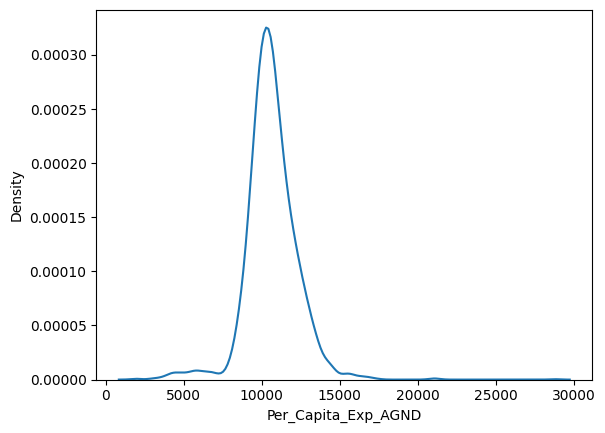

In [84]:
sns.kdeplot(data = df,x = 'Per_Capita_Exp_AGND')

<Axes: xlabel='Avg_Risk_Score_AGND', ylabel='Density'>

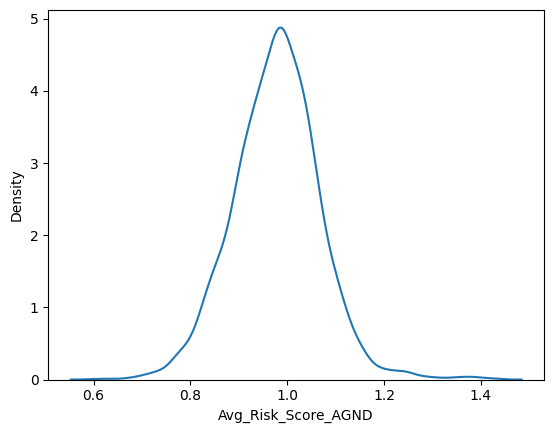

In [65]:
sns.kdeplot(data = df,x = 'Avg_Risk_Score_AGND')

<Axes: xlabel='Person_Years_AGND', ylabel='Density'>

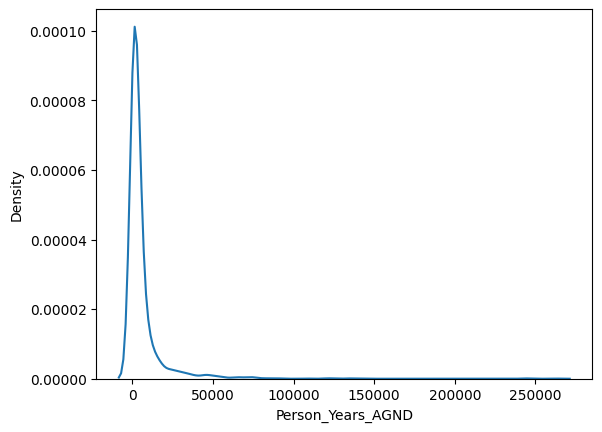

In [69]:
sns.kdeplot(data = df,x = 'Person_Years_AGND')

6.

<Axes: xlabel='Avg_Risk_Score_AGND', ylabel='Per_Capita_Exp_AGND'>

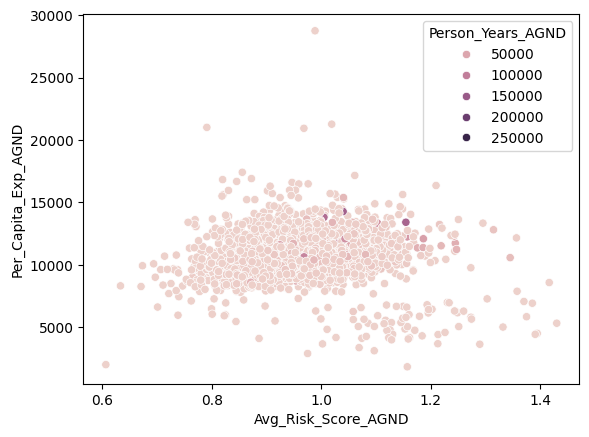

In [85]:
sns.scatterplot(data = df,x = 'Avg_Risk_Score_AGND', y = 'Per_Capita_Exp_AGND', hue = 'Person_Years_AGND')

There is a slight positive association between per capita expenditure and average risk score, with most counties clustering in the middle of the graph.

7.

In [87]:
VCV = df.loc[:,['Avg_Risk_Score_AGND','Per_Capita_Exp_AGND','Person_Years_AGND']].cov()
print(VCV,'\n')

                     Avg_Risk_Score_AGND  Per_Capita_Exp_AGND  \
Avg_Risk_Score_AGND             0.008129         2.251895e+00   
Per_Capita_Exp_AGND             2.251895         2.777792e+06   
Person_Years_AGND             133.524698         2.847436e+06   

                     Person_Years_AGND  
Avg_Risk_Score_AGND       1.335247e+02  
Per_Capita_Exp_AGND       2.847436e+06  
Person_Years_AGND         1.969178e+08   



The variance-covariance between per capita expenditure and the years is much stronger than either of those variables with the average risk score.